<a href="https://colab.research.google.com/github/pratikasarkar/Capstone_Project/blob/Prassanth/USED_CARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [0]:
df = pd.read_csv(r'/content/drive/My Drive/Capstone_Used_cars/autos.csv',encoding = "ISO-8859-1",parse_dates=['dateCrawled','dateCreated','lastSeen'],
                 infer_datetime_format=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [69]:
df.shape

(371528, 20)

#### Feature Description

* dateCrawled         : when advert was first crawled, all field-values are taken from this date
* name                : headline, which the owner of the car gave to the advert
* seller              : 'privat'(ger)/'private'(en) or 'gewerblich'(ger)/'dealer'(en)
* offerType           : 'Angebot'(ger)/'offer'(en) or 'Gesuch'(ger)/'request'(en)
* price               : the price on the advert to sell the car
* abtest              : ebay-intern variable (we have the ads splitted into two groups: the test group and the control group. A/B-Test)
* vehicleType         : one of eight vehicle-categories 
* yearOfRegistration  : at which year the car was first registered
* gearbox             : 'manuell'(ger)/'manual'(en) or 'automatik'(ger)/'automatic'(en)
* powerPS             : the power of the car in PS
* model               : the cars model
* kilometer           : how many kilometres the car has driven
* monthOfRegistration : at which month the car was first registered
* fuelType            : one of seven fuel-categories
* brand               : the cars brand
* notRepairedDamage   : if the car has a damage which is not repaired yet
* dateCreated         : the date for which the advert at 'ebay Kleinanzeigen' was created
* nrOfPictures        : number of pictures in the advert
* postalCode          : where in germany the car is located
* lastSeenOnline      : when the crawler saw this advert last online

# Data Cleaning

In [0]:
df1 = df.copy()

### Model

In [0]:
orig_list = list(df1['model'].value_counts().index)
converted_list = ['golf','other','3s','polo','corsa','astra','passat','a4','cclass','5s','eclass','a3','a6','focus','fiesta','transporter','twingo','2series','fortwo','aclass','vectra','1s','mondeo','clio','touran','3series','punto','zafira','megane','ibiza','ka','lupo','xseries','octavia','cooper','fabia','clk','micra','caddy','80','sharan','scenic','omega','slk','leon','laguna','civic','tt','1stseries','6series','iseries','galaxy','mclass','7s','meriva','yaris','great','mxseries','a5','kangoo','911','bclass','500','tiguan','vito','escort','one','arosa','zseries','bora','colt','beetle','berlingo','sprinter','tigra','v40','transit','touareg','fox','swift','insignia','c_max','corolla','panda','seicento','sl','v70','4series','scirocco','156','a1','primera','espace','grand','stilo','almera','a8','147','avensis','qashqai','eos','c3','c5','signum','Beetle','s_max','5series','q5','c4','matiz','ducato','agila','aygo','viano','getz','601','combo','100','carisma','cayenne','boxster','alhambra','cordoba','c2','superb','c1','kuga','forfour','rio','jetta','cuore','a2','altea','cadet','rav','picanto','sorento','mseries','accord','crseries','up','q7','vivaro','toledo','voyager','xcseries','Bravo','santa','doblo','logan','mode','verso','ptcruiser','cl','sportage','jazz','fusion','sandero','mustang','roomster','carnival','6s','ceed','gallant','v50','q3','tucson','lancer','auris','impreza','phaeton','freelander','glk','calibra','pajero','x_trail','850','159','jimny','ypsilon','spider','duster','clubman','yeti','cseries','cc','roadster','cherokee','x_type','gclass','captiva','vclass','wrangler','legacy','s60','300c','rxseries','defender','justy','sirion','forester','outlander','grade','niva','s_type','spark','r19','navara','cxseries','aveo','900','antara','90','juke','discovery','exeo','range_rover_sport','kalos','range_rover','citigo','lanos','mii','crossfire','range_rover_evoque','gl','nubira','move','lybra','145','v60','croma','amarok','delta','terios','lodgy','9000','charade','b_max','musa','materia','200','kappa','samara','elefantino','i3','kalina','serie_2','rangerover','serie_3','serie_1','discovery_sport']
df1['model'].replace(dict(zip(orig_list,converted_list)),inplace = True)

#### Dropping Constant / Quasi constant features

In [71]:
df1['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [72]:
df1['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [73]:
df1['nrOfPictures'].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

In [0]:
df1.drop(columns=['seller','offerType','nrOfPictures'],inplace = True)

In [0]:
#Date Crawled - when advert was first crawled, all field-values are taken from this date
#name - Car model name
df1.drop(columns=['dateCrawled','name'] , inplace = True)

### Price

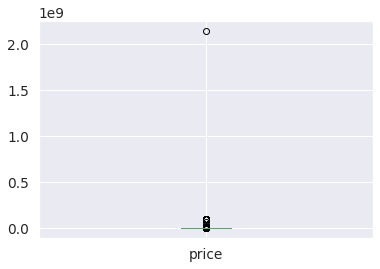

In [77]:
df1['price'].plot(kind= 'box')

In [0]:
df1.drop(df1[(df1['price'] < 100) | (df1['price'] > 100000)].index , axis =0, inplace = True)     #13723 

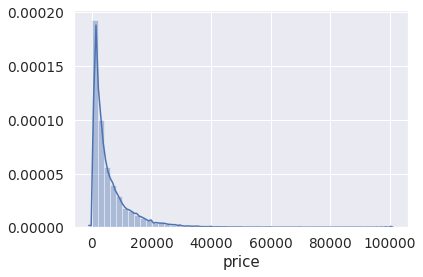

In [79]:
sns.distplot(df1['price'])

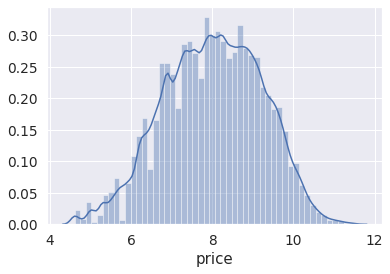

In [80]:
sns.distplot(np.log(df1['price']))

In [0]:
df1['price'] = np.log(df1['price'])

### Vechicle Type

In [82]:
df1['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [0]:
#kombi - station wagon ,limousine - sedan , kleinwagen - small car , cabrio - convertible , andere - other
types = {'limousine':'Sedan' , 
         'kombi' : 'Station wagon' , 
         'kleinwagen' : 'Small car' , 
         'cabrio' : 'Convertible' , 
         'andere' : 'Other'}
df1['vehicleType'].replace(types , inplace = True)
df1['vehicleType'] = df1['vehicleType'].astype('category')

Text(0.5, 1.0, 'Vehicle Types')

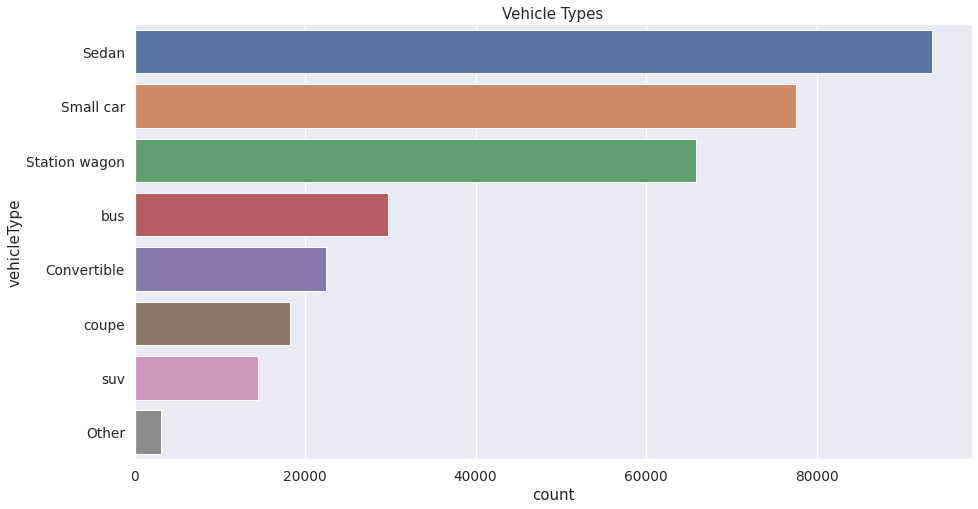

In [84]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,8))
g = sns.countplot(
    data=df1,
    y='vehicleType',
    order = df1['vehicleType'].value_counts().index,
    palette='deep'
)
g.set_title('Vehicle Types')

### Year of Registration

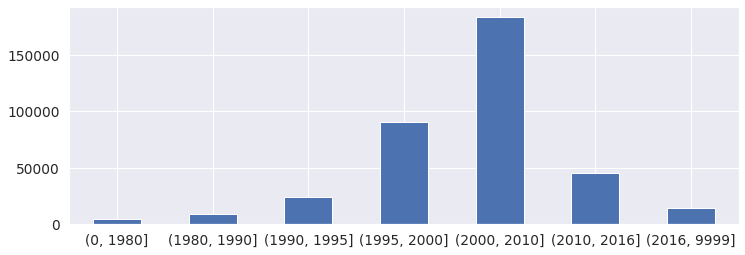

In [85]:
a = pd.cut(df['yearOfRegistration'], bins=[0, 1980, 1990, 1995,2000,2010,2016,9999])
a.value_counts(sort=False).plot.bar(rot=0, figsize=(12,4))

In [86]:
2df['dateCrawled'].max()
#Since the latest crawled date is 2016 , cars cannot be registered after that

SyntaxError: ignored

In [0]:
#Choosing years of registration between 1995 and 2016
df1.drop(df1[(df1['yearOfRegistration'] < 1995) | (df1['yearOfRegistration'] > 2017)].index,inplace = True)   #24807

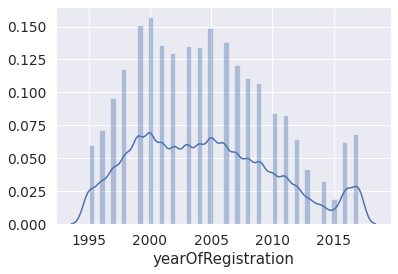

In [88]:
sns.distplot(df1['yearOfRegistration'])

### Gearbox

In [89]:
df1['gearbox'].value_counts(dropna = False)

manuell      244087
automatik     70277
NaN           14229
Name: gearbox, dtype: int64

In [0]:
df1['gearbox'].replace({'manuell':'manual' , 
                        'automatik':'automatic'} , inplace = True)
df1['gearbox'] = df1['gearbox'].astype('category')

### Fuel type

In [91]:
df1['fuelType'].unique()

array(['diesel', 'benzin', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [0]:
df1['fuelType'].replace({'diesel':'Diesel' , 
                         'benzin':'Petrol' , 
                         'lpg':'LPG' ,
                         'cng':'CNG' ,
                         'elektro':'Electric' , 
                         'andere':'Others'} , inplace = True)
df1['fuelType'] = df1['fuelType'].astype('category')

Text(0.5, 1.0, 'Vehicle Types')

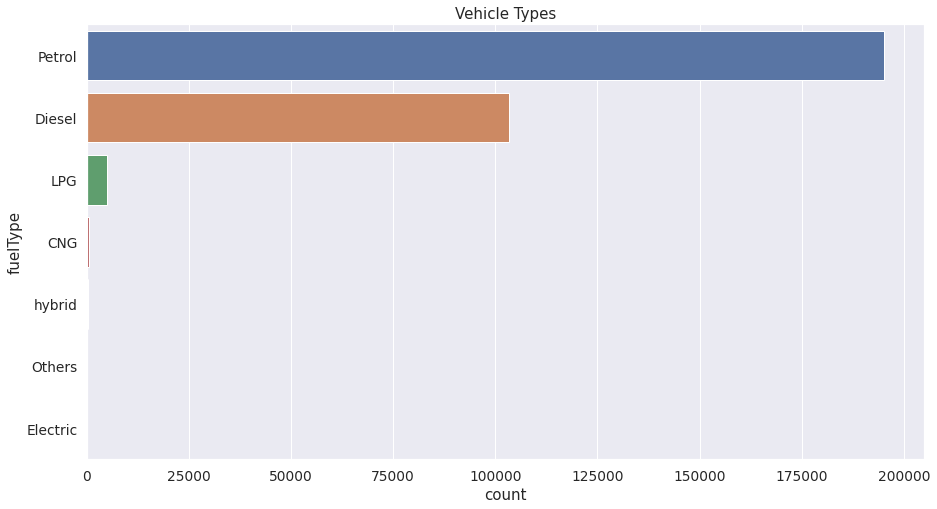

In [93]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,8))
g = sns.countplot(
    data=df1,
    y='fuelType',
    order = df1['fuelType'].value_counts().index
)
g.set_title('Vehicle Types')

### Month of Registration

In [94]:
df1['monthOfRegistration'].unique()

array([ 5,  8,  6,  7, 10,  0, 12, 11,  2,  3,  1,  4,  9])

In [0]:
df1['monthOfRegistration'].replace(0,np.nan , inplace = True)

### Not Repaired Damage

In [96]:
df1['notRepairedDamage'].value_counts(dropna=False)

nein    240947
NaN      57086
ja       30560
Name: notRepairedDamage, dtype: int64

In [0]:
df1['notRepairedDamage'].replace({'nein' : 'No' , 
                                  'ja' : 'Yes'} , inplace = True)
df1['notRepairedDamage'] = df1['notRepairedDamage'].astype('category')

### Power PS

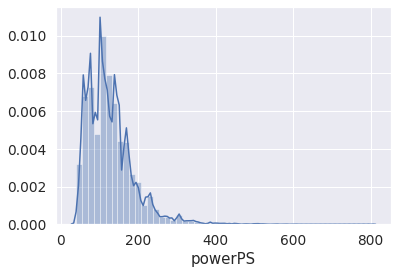

In [98]:
#Keeping the horsepower between 40 and 800 PS
df1.drop(df1[(df1['powerPS'] < 40) | (df1['powerPS'] > 800)].index , inplace = True)
sns.distplot(df1['powerPS'])

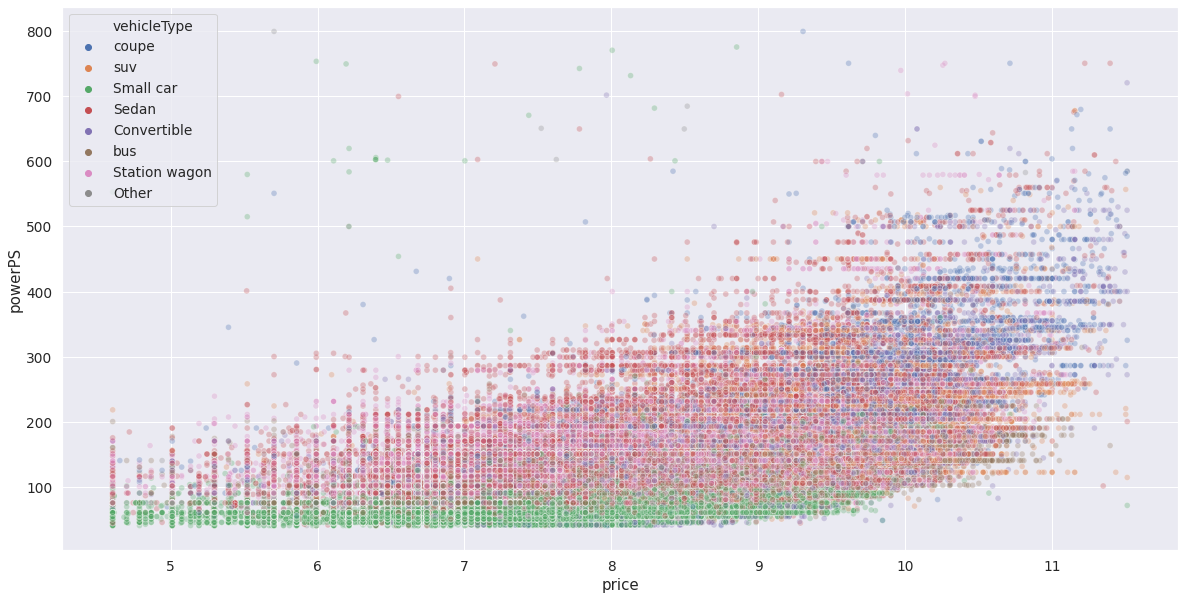

In [99]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['price'] , df1['powerPS'],hue = df1['vehicleType'] , alpha = 0.3)

In [0]:
#df1[(df1['price'] > 800000) & (df1['powerPS'] < 400)]

In [101]:
df1['model'].nunique()

247

### Kilometer driven

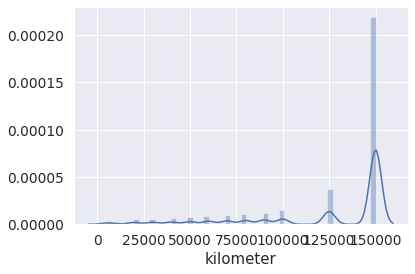

In [102]:
sns.distplot(df1['kilometer'])

### Number of days online

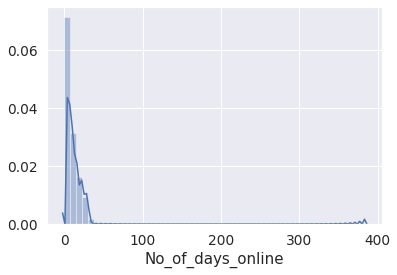

In [103]:
df1['No_of_days_online'] = (df1['lastSeen'] - df1['dateCreated']).dt.days
sns.distplot(df1['No_of_days_online'])

In [104]:
df2 = df1.dropna()     #64717
df2.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,No_of_days_online
3,7.313220,test,Small car,2001,manual,75,golf,150000,6.0,Petrol,volkswagen,No,2016-03-17,91074,2016-03-17 17:40:17,0
4,8.188689,test,Small car,2008,manual,69,fabia,90000,7.0,Diesel,skoda,No,2016-03-31,60437,2016-04-06 10:17:21,6
5,6.476972,test,Sedan,1995,manual,102,3s,150000,10.0,Petrol,bmw,Yes,2016-04-04,33775,2016-04-06 19:17:07,2
6,7.696213,test,Convertible,2004,manual,109,2series,150000,8.0,Petrol,peugeot,No,2016-04-01,67112,2016-04-05 18:18:39,4
10,7.600902,control,Sedan,2004,manual,105,3series,150000,12.0,Petrol,mazda,No,2016-03-26,96224,2016-04-06 10:45:34,11


In [105]:
#Normality test
test_stat,p_value = st.shapiro(df2['price'])
print(f'P value for normality test is {p_value}')

P value for normality test is 0.0


In [0]:
#Statistical Significance testing
#2 sample independent T test
# gearbox , abtest , not repaired damage

In [107]:
for i in ['gearbox' , 'abtest' , 'notRepairedDamage']:
    a = df2[df2[i] == df2[i].unique()[0]]['price']
    b = df2[df2[i] == df2[i].unique()[1]]['price']
    test_stat , pval = st.ttest_ind(a,b)
    print(f'Pvalue for {i} is {pval}')

Pvalue for gearbox is 0.0
Pvalue for abtest is 0.525007621743471
Pvalue for notRepairedDamage is 0.0


In [0]:
#1 way anova
#vehicle type , yearOfRegistration , kilometer , monthof reg , fuel type , brand , 

In [0]:
#afunction(*list(dic.values()))

In [110]:
for i in ['vehicleType' , 'yearOfRegistration' , 'kilometer' , 'monthOfRegistration' , 'fuelType' , 'brand','model']:
    #print(i)
    cat = {}
    for j in range(df2[i].nunique()):
        cat[df2[i].unique()[j]] = df2[df2[i] == df2[i].unique()[j]]['price']
    #print({key: len(value) for key, value in cat.items()})
    tstat , pval = st.f_oneway(*list(cat.values()))
    print(f'P-value for {i} is {pval}')

P-value for vehicleType is 0.0
P-value for yearOfRegistration is 0.0
P-value for kilometer is 0.0
P-value for monthOfRegistration is 2.192788656476401e-30
P-value for fuelType is 0.0
P-value for brand is 0.0
P-value for model is 0.0


In [0]:
#Varience test
#Powerps 

In [112]:
st.levene(df2['powerPS'],df2['price'])

LeveneResult(statistic=227460.07655410952, pvalue=0.0)

In [0]:
#number of days online

In [114]:
st.levene(df2['No_of_days_online'],df2['price'])

LeveneResult(statistic=220454.79166621255, pvalue=0.0)

In [0]:
df2.drop(columns='abtest',inplace = True)

In [0]:
df2.dropna(inplace = True)

In [117]:
df2.shape

(227529, 15)

In [118]:
df2.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,No_of_days_online
3,7.313220,Small car,2001,manual,75,golf,150000,6.0,Petrol,volkswagen,No,2016-03-17,91074,2016-03-17 17:40:17,0
4,8.188689,Small car,2008,manual,69,fabia,90000,7.0,Diesel,skoda,No,2016-03-31,60437,2016-04-06 10:17:21,6
5,6.476972,Sedan,1995,manual,102,3s,150000,10.0,Petrol,bmw,Yes,2016-04-04,33775,2016-04-06 19:17:07,2
6,7.696213,Convertible,2004,manual,109,2series,150000,8.0,Petrol,peugeot,No,2016-04-01,67112,2016-04-05 18:18:39,4
10,7.600902,Sedan,2004,manual,105,3series,150000,12.0,Petrol,mazda,No,2016-03-26,96224,2016-04-06 10:45:34,11


In [0]:
#df2.to_csv('used_cars_na_dropped.csv',index=False)

### Choosing best Encdoing method

In [0]:
X = df2.drop(columns='price')
y = df2.price

In [0]:
# cat_cols = [i for i in X.columns if df2[i].dtypes == 'O']
# num_cols = [i for i in X.columns if df2[i].dtypes != 'O']

In [0]:
cat_cols = ['vehicleType','gearbox','model','fuelType','brand','notRepairedDamage' , 'yearOfRegistration','kilometer']
num_cols = ['powerPS' , 'No_of_days_online']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3 , random_state = 3)

##### One Hot Encoding

In [0]:
def OHE(df):

    df_OHE = pd.concat([df[num_cols], pd.get_dummies(df[cat_cols], drop_first=True)],axis=1)
    return df_OHE

X_train_OHE = OHE(X_train)
X_test_OHE = OHE(X_test)

X_train_OHE.head()

,powerPS,No_of_days_online,yearOfRegistration,kilometer,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_manuell,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_6_reihe,model_6er,model_7er,model_80,model_850,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,...,fuelType_hybrid,fuelType_lpg,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_nein
232438,260,6,2007,125000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
313967,260,26,2008,125000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
350377,150,0,2007,150000,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
225864,144,3,2003,150000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
76000,190,12,2007,125000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


##### Count Encoding

In [0]:
def categorical_to_counts(df_train, df_test):
    #df copy
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    for col in cat_cols:
        counts_map = df_train_temp[col].value_counts().to_dict()
        df_train_temp[col] = df_train_temp[col].map(counts_map)
        df_test_temp[col] = df_test_temp[col].map(counts_map)
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)
X_train_count.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,No_of_days_online
232438,46797,10108,124135,260,1665,18373,5,101916,2523,147018,6
313967,46797,9377,124135,260,625,18373,3,101916,2523,147018,26
350377,7667,10108,124135,150,48,98645,2,57808,16497,147018,0
225864,46797,10352,124135,144,562,98645,7,101916,16497,147018,3
76000,46797,10108,38512,190,10429,18373,9,57808,15941,147018,12


##### Mean Encoding

In [0]:
def cat_to_mean(df_train, df_test, y_train, y_test):
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()

    for col in cat_cols:
        ordered_labels = df_train_temp.groupby(
            [col])['price'].mean().to_dict()
        # Mapping
        df_train_temp[col] = df_train[col].map(ordered_labels)
        df_test_temp[col] = df_test[col].map(ordered_labels)

    # remove the target
    df_train_temp.drop(['price'], axis=1, inplace=True)
    df_test_temp.drop(['price'], axis=1, inplace=True)

    return df_train_temp, df_test_temp


X_train_mean, X_test_mean = cat_to_mean(
    X_train, X_test, y_train, y_test)

X_train_mean.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,No_of_days_online
232438,8.321099,8.827949,8.087280,260,7.811274,8.403415,5,8.009539,8.017123,8.395805,6
313967,8.321099,9.000783,8.087280,260,7.917101,8.403415,3,8.009539,8.017123,8.395805,26
350377,9.277144,8.827949,8.087280,150,9.081411,7.914756,2,8.774589,7.704902,8.395805,0
225864,8.321099,7.960123,8.087280,144,6.939737,7.914756,7,8.009539,7.704902,8.395805,3
76000,8.321099,8.827949,8.920681,190,8.280942,8.403415,9,8.774589,8.716343,8.395805,12


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

# rfr = RandomForestRegressor(n_jobs=-1)
# rfr.fit(X_train_OHE,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# predict = rfr.predict(X_test_OHE)

In [0]:
# mean_squared_error(y_test,predict)

0.13994983956055934

In [0]:
def eval(X,y):
    for i in (LinearRegression() , LassoCV() , RandomForestRegressor(max_depth=5,n_jobs=-1)):
        scoring = 'neg_mean_squared_error'
        kfold = model_selection.KFold(n_splits=10, random_state=3)
        results = model_selection.cross_val_score(i, X, y, cv=kfold, scoring=scoring)
        print(("MSE for %s: %.3f (%.3f)") % (str(i).split('(')[0],results.mean(), results.std()))

In [0]:
eval(X_train_mean,y_train)


MSE for LinearRegression: -0.183 (0.005)
MSE for LassoCV: -0.217 (0.005)
MSE for RandomForestRegressor: -0.238 (0.005)


In [0]:
eval(X_train_count,y_train)

MSE for LinearRegression: -0.456 (0.007)
MSE for LassoCV: -0.617 (0.006)
MSE for RandomForestRegressor: -0.403 (0.005)


In [0]:
eval(X_train_OHE,y_train)

MSE for LinearRegression: -0.159 (0.005)
MSE for LassoCV: -0.709 (0.006)
MSE for RandomForestRegressor: -0.261 (0.007)


In [0]:
###Going with mean encoding

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [0]:
X_train_scaled = X_train_mean
X_test_scaled = X_test_mean
scaler = StandardScaler()
scaler.fit(X_train_mean)
X_train_scaled.iloc[:,:] = scaler.transform(X_train_mean)
X_test_scaled.iloc[:,:] = scaler.transform(X_test_mean)

In [0]:
#Knn Hyperparameter tuning
knn=KNeighborsRegressor()
param={'n_neighbors':np.arange(3,100),'weights':['uniform','distance']}
gsearch_knn=RandomizedSearchCV(knn,param,cv=10,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)
gsearch_knn.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,..., 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'weights'

In [0]:
gsearch_knn.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [0]:
rsearch_knn_best_params = {'n_neighbors': 12, 'weights': 'distance'}

In [0]:
# #Knn Hyperparameter tuning
# knn=KNeighborsRegressor()
# param={'n_neighbors':np.arange(3,100),'weights':['uniform','distance']}
# gsearch_knn=GridSearchCV(knn,param,cv=10,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)
# gsearch_knn.fit(X_train_scaled,y_train)
# gsearch_knn_best_params = {'n_neighbors': 17, 'weights': 'distance'}

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfr = RandomForestRegressor(random_state=3)
params_rfr = { 'n_estimators' : sp_randint(100 , 400) , 
           'max_features' : ['log2','sqrt'] ,
           'max_depth' : sp_randint(2,10) , 
           'min_samples_leaf' : [0.1, 0.2] }

rsearch_rfc = RandomizedSearchCV(estimator=rfr,param_distributions=params_rfr,cv=10,
                                 scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)

rsearch_rfc.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [0]:
rsearch_rfc.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 154}

In [0]:
rsearch_rfc_best_params ={'max_depth': 6,
                          'max_features': 'log2',
                          'min_samples_leaf': 0.1,
                          'n_estimators': 154}

In [0]:
LR = LinearRegression()
KNN = KNeighborsRegressor(**rsearch_knn_best_params,n_jobs=-1)

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
LR_bag=BaggingRegressor(base_estimator=LR,n_estimators=25,random_state=3,n_jobs=-1)
KNN_bag=BaggingRegressor(base_estimator=KNN,n_estimators=80,random_state=3,n_jobs=-1)
DT_reg=DecisionTreeRegressor(max_depth=4,random_state=3)
RF=RandomForestRegressor(**rsearch_rfc_best_params,random_state=3,n_jobs=-1)
#Boosting models
LR_boost=AdaBoostRegressor(base_estimator=LR,n_estimators=50)
RF_boost=AdaBoostRegressor(base_estimator=RF,n_estimators=70)
DT_boost=AdaBoostRegressor(n_estimators=50)

In [0]:
# RMSE scores: 0.43 (+/- 0.00003) [Lin Reg]
# Adj R-Square:0.85 (+/- 0.00001)[Lin Reg]
# --------------------------------------------------
# RMSE scores: 0.39 (+/- 0.00002) [KNN Reg]
# Adj R-Square:0.88 (+/- 0.00001)[KNN Reg]
# --------------------------------------------------
# RMSE scores: 0.55 (+/- 0.00004) [Decision Tree]
# Adj R-Square:0.75 (+/- 0.00002)[Decision Tree]
# --------------------------------------------------
# RMSE scores: 0.67 (+/- 0.00001) [Random Forest Reg]
# Adj R-Square:0.64 (+/- 0.00001)[Random Forest Reg]
# --------------------------------------------------
# RMSE scores: 0.43 (+/- 0.00003) [LR_Bag]
# Adj R-Square:0.85 (+/- 0.00001)[LR_Bag]
# --------------------------------------------------
# RMSE scores: 0.50 (+/- 0.00003) [LR_Boost]
# Adj R-Square:0.80 (+/- 0.00002)[LR_Boost]
# --------------------------------------------------
# RMSE scores: 0.61 (+/- 0.00006) [RF_boost]
# Adj R-Square:0.70 (+/- 0.00006)[RF_boost]
# --------------------------------------------------
# RMSE scores: 0.76 (+/- 0.00086) [DT_boost]
# Adj R-Square:0.54 (+/- 0.00125)[DT_boost]
# --------------------------------------------------

In [0]:
X = X_train_scaled
Y = y_train
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True,random_state=3)
for model, name in zip([LR,KNN,DT_reg,RF,LR_bag,LR_boost,RF_boost,DT_boost]
                       ,['Lin Reg','KNN Reg','Decision Tree' ,'Random Forest Reg','LR_Bag','LR_Boost','RF_boost','DT_boost']):
    rmse = [];adj_r=[]
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        met=np.sqrt(mean_squared_error(Ytest,Y_predict))
        rmse.append(met)
        Adj_r2 = 1-(1-metrics.r2_score(Ytest,Y_predict))*(X_test.shape[0] -1)/(X_test.shape[0]-X_test.shape[1]-1)
        adj_r.append(Adj_r2)
    print("RMSE scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(rmse),
                                    np.var(rmse,ddof=1), name ))
    print('Adj R-Square:%0.02f (+/- %0.5f)[%s]' % (np.mean(adj_r),
                                    np.var(adj_r,ddof=1), name ))
    print('-'*50)

RMSE scores: 0.43 (+/- 0.00003) [Lin Reg]
Adj R-Square:0.85 (+/- 0.00001)[Lin Reg]
--------------------------------------------------
RMSE scores: 0.39 (+/- 0.00002) [KNN Reg]
Adj R-Square:0.88 (+/- 0.00001)[KNN Reg]
--------------------------------------------------
RMSE scores: 0.55 (+/- 0.00004) [Decision Tree]
Adj R-Square:0.75 (+/- 0.00002)[Decision Tree]
--------------------------------------------------
RMSE scores: 0.67 (+/- 0.00001) [Random Forest Reg]
Adj R-Square:0.64 (+/- 0.00001)[Random Forest Reg]
--------------------------------------------------
RMSE scores: 0.43 (+/- 0.00003) [LR_Bag]
Adj R-Square:0.85 (+/- 0.00001)[LR_Bag]
--------------------------------------------------
RMSE scores: 0.50 (+/- 0.00003) [LR_Boost]
Adj R-Square:0.80 (+/- 0.00002)[LR_Boost]
--------------------------------------------------
RMSE scores: 0.61 (+/- 0.00006) [RF_boost]
Adj R-Square:0.70 (+/- 0.00006)[RF_boost]
--------------------------------------------------
RMSE scores: 0.76 (+/- 0.000

In [0]:
import xgboost as xgb

In [0]:
reg = xgb.sklearn.XGBRegressor(nthread=-1, seed=42)
reg.fit(X_train_mean,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [0]:
np.sqrt(mean_squared_error(y_test,reg.predict(X_test_mean)))

0.35437944750784306

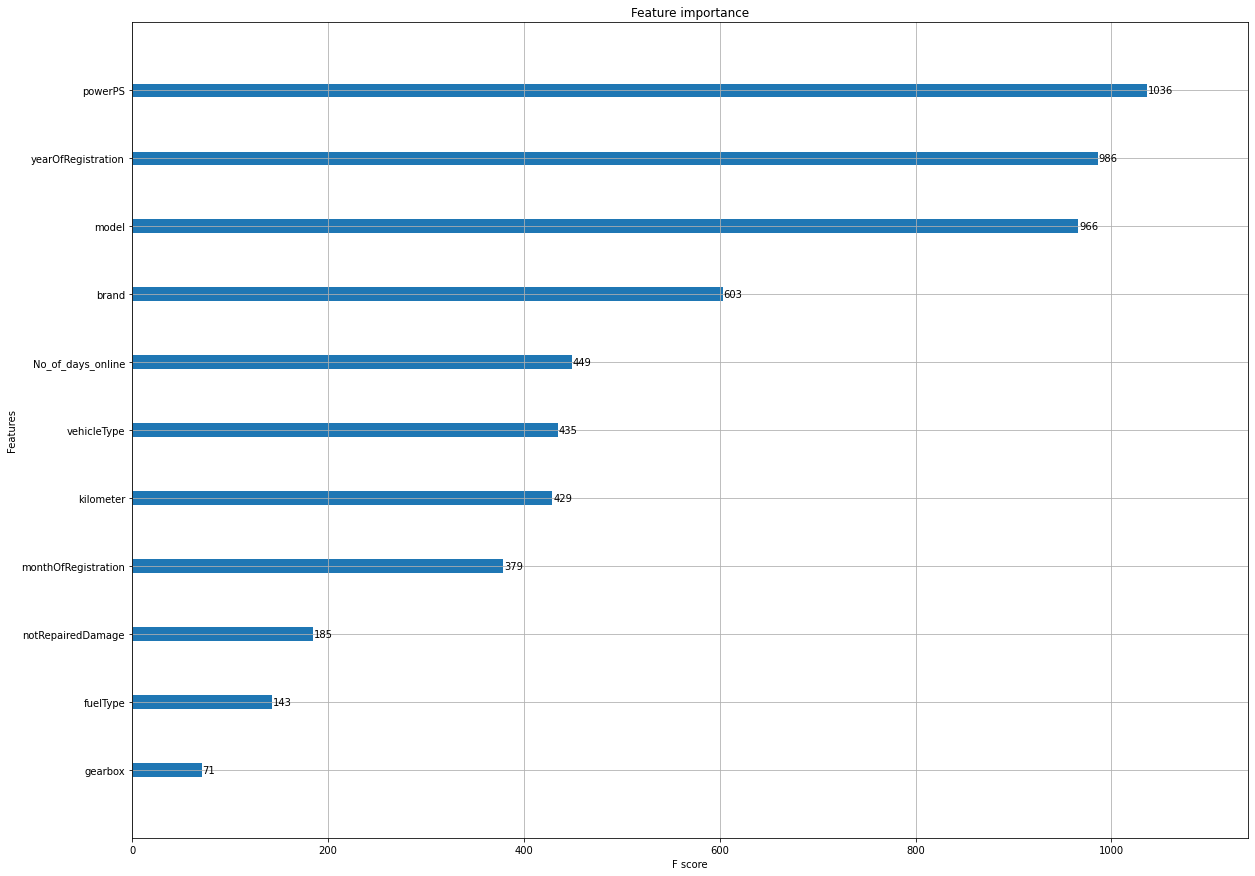

In [0]:
plt.figure(figsize=(20,15)) 
xgb.plot_importance(reg, ax=plt.gca())

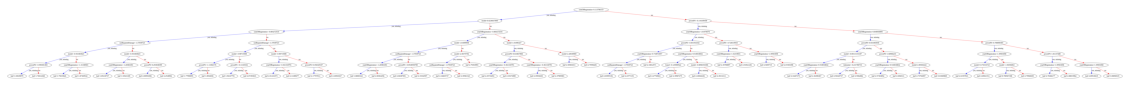

In [0]:
plt.figure(figsize=(20,15)) 
xgb.plot_tree(reg, ax=plt.gca())

In [0]:
#Hyperparameter Tuning
dtrain = xgb.DMatrix(X_train_mean, label=y_train)
dtest = xgb.DMatrix(X_test_mean, label=y_test)

In [0]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [0]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Test-rmse:5.51949
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:3.87784
[2]	Test-rmse:2.73250
[3]	Test-rmse:1.93623
[4]	Test-rmse:1.38643
[5]	Test-rmse:1.01137
[6]	Test-rmse:0.76140
[7]	Test-rmse:0.60039
[8]	Test-rmse:0.50237
[9]	Test-rmse:0.44519
[10]	Test-rmse:0.41331
[11]	Test-rmse:0.39610
[12]	Test-rmse:0.38626
[13]	Test-rmse:0.38039
[14]	Test-rmse:0.37738
[15]	Test-rmse:0.37536
[16]	Test-rmse:0.37254
[17]	Test-rmse:0.37173
[18]	Test-rmse:0.37103
[19]	Test-rmse:0.37059
[20]	Test-rmse:0.36970
[21]	Test-rmse:0.36928
[22]	Test-rmse:0.36861
[23]	Test-rmse:0.36767
[24]	Test-rmse:0.36749
[25]	Test-rmse:0.36662
[26]	Test-rmse:0.36618
[27]	Test-rmse:0.36595
[28]	Test-rmse:0.36494
[29]	Test-rmse:0.36483
[30]	Test-rmse:0.36432
[31]	Test-rmse:0.36399
[32]	Test-rmse:0.36364
[33]	Test-rmse:0.36350
[34]	Test-rmse:0.36313
[35]	Test-rmse:0.36274
[36]	Test-rmse:0.36264
[37]	Test-rmse:0.36199
[38]	Test-rmse:0.36204
[39]	Test-rmse:0.36155
[40]	Test-rmse:0.36123
[41]	Test-

In [0]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics='rmse',
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5.516556,0.000906,5.516487,0.003799
1,3.875776,0.000661,3.875509,0.002583
2,2.730964,0.000457,2.730730,0.001848
3,1.935033,0.000379,1.935070,0.001522
4,1.385157,0.000456,1.385534,0.001230
...,...,...,...,...
240,0.305672,0.000347,0.347569,0.002034
241,0.305564,0.000362,0.347563,0.002072
242,0.305436,0.000370,0.347564,0.002055
243,0.305317,0.000384,0.347551,0.002066


In [0]:
cv_results['test-rmse-mean'].min()

0.34753280000000003

In [0]:
# max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,8)
    for min_child_weight in range(5,8)
]



min_rmse = 1
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics='rmse',
        early_stopping_rounds=10
    )
    
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))


CV with max_depth=6, min_child_weight=5
	RMSE 0.3473606 for 294 rounds
CV with max_depth=6, min_child_weight=6
	RMSE 0.3475434 for 257 rounds
CV with max_depth=6, min_child_weight=7
	RMSE 0.3472698 for 287 rounds
CV with max_depth=7, min_child_weight=5
	RMSE 0.3483222 for 179 rounds
CV with max_depth=7, min_child_weight=6
	RMSE 0.34903399999999996 for 155 rounds
CV with max_depth=7, min_child_weight=7
	RMSE 0.348419 for 177 rounds
Best params: 6, 7, RMSE: 0.3472698


In [0]:
#Updating Params
params['max_depth'] = 6
params['min_child_weight'] = 7

In [0]:
#subsample and colsample_bytree

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]



min_rmse = 1
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics='rmse',
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	RMSE 0.3472698 for 287 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 0.347 for 297 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 0.3474016 for 269 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 0.3471662 for 319 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 0.3499072 for 167 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 0.34896340000000003 for 230 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 0.3485334 for 261 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 0.34849220000000003 for 237 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 0.3503986 for 215 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 0.3501792 for 209 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 0.34933319999999995 for 279 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 0.3499046 for 248 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 0.3521336 for 171 rounds
CV with subsample=0.7, colsample=0.9
	RMSE 0.3516012 for 216 rounds
CV with subsample=0.7,

In [0]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.9

In [0]:
#ETA

min_rmse = 1
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics='rmse',
            early_stopping_rounds=10
          )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3


KeyboardInterrupt: ignored

In [0]:
params['eta'] = .01

In [0]:
#Final Params
params

{'colsample_bytree': 0.9,
 'eta': 0.01,
 'max_depth': 6,
 'min_child_weight': 7,
 'objective': 'reg:squarederror',
 'subsample': 1.0}

In [0]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[0]	Test-rmse:7.79018
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:7.71256
[2]	Test-rmse:7.63601
[3]	Test-rmse:7.56000
[4]	Test-rmse:7.48477
[5]	Test-rmse:7.41024
[6]	Test-rmse:7.33642
[7]	Test-rmse:7.26365
[8]	Test-rmse:7.19134
[9]	Test-rmse:7.11973
[10]	Test-rmse:7.04887
[11]	Test-rmse:6.97894
[12]	Test-rmse:6.90951
[13]	Test-rmse:6.84077
[14]	Test-rmse:6.77267
[15]	Test-rmse:6.70531
[16]	Test-rmse:6.63861
[17]	Test-rmse:6.57252
[18]	Test-rmse:6.50715
[19]	Test-rmse:6.44242
[20]	Test-rmse:6.37840
[21]	Test-rmse:6.31499
[22]	Test-rmse:6.25219
[23]	Test-rmse:6.19006
[24]	Test-rmse:6.12867
[25]	Test-rmse:6.06777
[26]	Test-rmse:6.00745
[27]	Test-rmse:5.94776
[28]	Test-rmse:5.88864
[29]	Test-rmse:5.83010
[30]	Test-rmse:5.77241
[31]	Test-rmse:5.71509
[32]	Test-rmse:5.65836
[33]	Test-rmse:5.60216
[34]	Test-rmse:5.54652
[35]	Test-rmse:5.49144
[36]	Test-rmse:5.43694
[37]	Test-rmse:5.38295
[38]	Test-rmse:5.32964
[39]	Test-rmse:5.27677
[40]	Test-rmse:5.22455
[41]	Test-

In [0]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:7.79018
[1]	Test-rmse:7.71256
[2]	Test-rmse:7.63601
[3]	Test-rmse:7.56000
[4]	Test-rmse:7.48477
[5]	Test-rmse:7.41024
[6]	Test-rmse:7.33642
[7]	Test-rmse:7.26365
[8]	Test-rmse:7.19134
[9]	Test-rmse:7.11973
[10]	Test-rmse:7.04887
[11]	Test-rmse:6.97894
[12]	Test-rmse:6.90951
[13]	Test-rmse:6.84077
[14]	Test-rmse:6.77267
[15]	Test-rmse:6.70531
[16]	Test-rmse:6.63861
[17]	Test-rmse:6.57252
[18]	Test-rmse:6.50715
[19]	Test-rmse:6.44242
[20]	Test-rmse:6.37840
[21]	Test-rmse:6.31499
[22]	Test-rmse:6.25219
[23]	Test-rmse:6.19006
[24]	Test-rmse:6.12867
[25]	Test-rmse:6.06777
[26]	Test-rmse:6.00745
[27]	Test-rmse:5.94776
[28]	Test-rmse:5.88864
[29]	Test-rmse:5.83010
[30]	Test-rmse:5.77241
[31]	Test-rmse:5.71509
[32]	Test-rmse:5.65836
[33]	Test-rmse:5.60216
[34]	Test-rmse:5.54652
[35]	Test-rmse:5.49144
[36]	Test-rmse:5.43694
[37]	Test-rmse:5.38295
[38]	Test-rmse:5.32964
[39]	Test-rmse:5.27677
[40]	Test-rmse:5.22455
[41]	Test-rmse:5.17285
[42]	Test-rmse:5.12151
[43]	Test-rmse:5.0707

In [0]:
best_model.save_model("/content/drive/My Drive/Capstone_Used_cars/XGBoost.model")

In [0]:
loaded_model = xgb.Booster()
loaded_model.load_model("/content/drive/My Drive/Capstone_Used_cars/XGBoost.model")

Adj_r2_train = 1-(1-metrics.r2_score(y_train,loaded_model.predict(dtrain)))*(dtrain.num_row() -1)/(dtrain.num_row()-dtrain.num_col()-1)
Adj_r2_test = 1-(1-metrics.r2_score(y_test,loaded_model.predict(dtest)))*(dtest.num_row() -1)/(dtest.num_row()-dtest.num_col()-1)

print(f'RMSE for TRAIN is {np.round(np.sqrt(mean_squared_error(y_train,loaded_model.predict(dtrain))),2)}')
print(f'Adj R2 for train is {Adj_r2_train}')
print(f'RMSE for TEST is {np.round(np.sqrt(mean_squared_error(y_test,loaded_model.predict(dtest))),2)}')
print(f'Adj R2 for test is {Adj_r2_test}')

RMSE for TRAIN is 0.35
Adj R2 for train is 0.9019814485251739
RMSE for TEST is 0.36
Adj R2 for test is 0.8970238501486602
